In [1]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


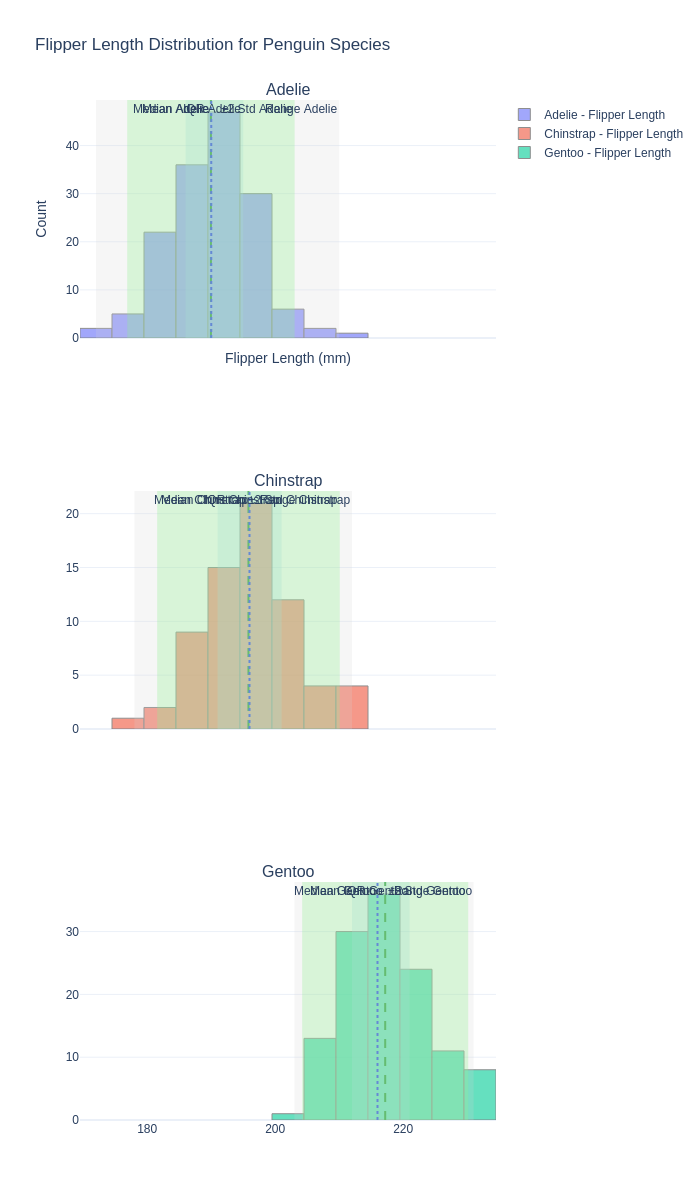

In [7]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset from the web
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Group by species and calculate statistics
grouped = penguins.groupby('species')

# Create subplots with one row for each species
fig = make_subplots(
    rows=len(grouped), 
    cols=1, 
    shared_xaxes=True, 
    subplot_titles=[f'{species}' for species in grouped.groups],
    vertical_spacing=0.15  # Increase spacing to prevent title overlap
)

# Keep track of the row number
row_num = 1

for species, data in grouped:
    flipper_length = data['flipper_length_mm']

    # Calculate the required statistics
    mean_val = flipper_length.mean()
    median_val = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    lower_iqr = flipper_length.quantile(0.25)
    upper_iqr = flipper_length.quantile(0.75)
    std_val = flipper_length.std()
    lower_std = mean_val - 2 * std_val
    upper_std = mean_val + 2 * std_val

    # Add a histogram for this species
    fig.add_trace(go.Histogram(
        x=flipper_length,
        name=f'{species} - Flipper Length',
        opacity=0.6,
        xbins=dict(size=5),
        marker=dict(line=dict(width=1))
    ), row=row_num, col=1)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_val, line_width=2, line_dash="dash", line_color="green", annotation_text=f'Mean {species}', annotation_position="top left", row=row_num, col=1)
    fig.add_vline(x=median_val, line_width=2, line_dash="dot", line_color="blue", annotation_text=f'Median {species}', annotation_position="top left", row=row_num, col=1)

    # Add vertical rectangles for the range, IQR, and 2 standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightgray", opacity=0.2, line_width=0, annotation_text=f'Range {species}', annotation_position="top right", row=row_num, col=1)
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="lightblue", opacity=0.3, line_width=0, annotation_text=f'IQR {species}', annotation_position="top right", row=row_num, col=1)
    fig.add_vrect(x0=lower_std, x1=upper_std, fillcolor="lightgreen", opacity=0.3, line_width=0, annotation_text=f'±2 Std {species}', annotation_position="top right", row=row_num, col=1)

    row_num += 1

# Update layout
fig.update_layout(
    title='Flipper Length Distribution for Penguin Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Count',
    barmode='overlay',
    template='plotly_white',
    height=600 + 200 * len(grouped),  # Adjust height based on number of subplots
)

# Show the plot
fig.show(renderer="png")


TypeError: Figure.show() got an unexpected keyword argument 'renderer'

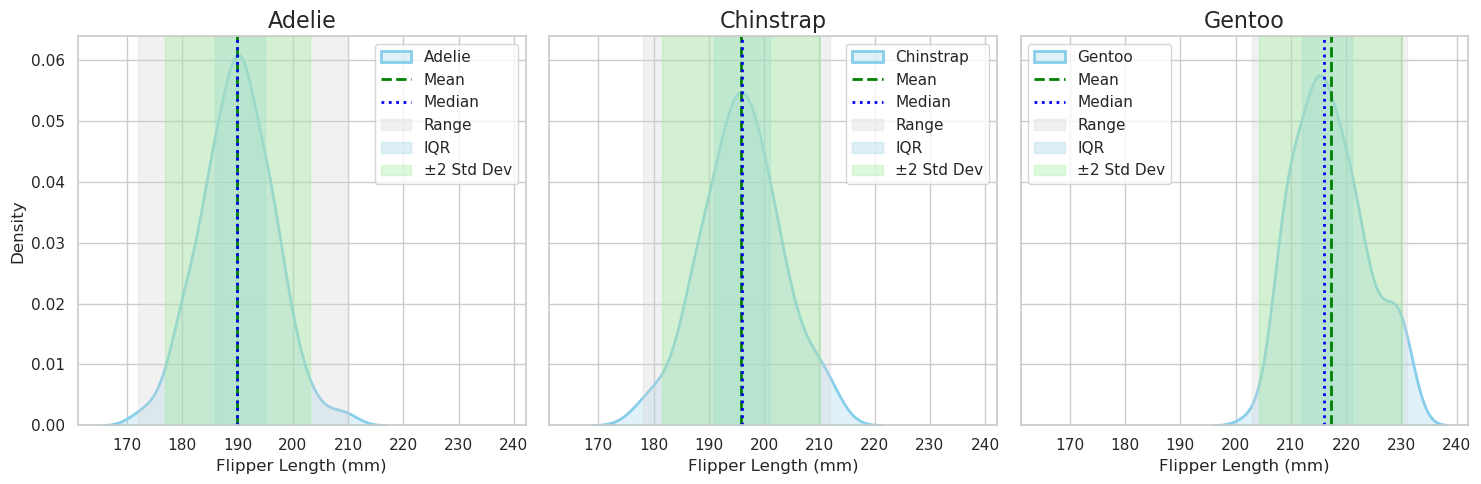

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the web
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get the unique species
species_list = penguins['species'].unique()

# Set up the figure with 3 columns (in case there are more species than 3, adjust rows accordingly)
n_cols = 3
n_rows = int(np.ceil(len(species_list) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=True, sharey=True)

# Flatten axes array to easily iterate
axes = axes.flatten()

# Loop through each species and plot its KDE along with statistics
for idx, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    iqr_val = species_data.quantile(0.75) - species_data.quantile(0.25)
    lower_iqr = species_data.quantile(0.25)
    upper_iqr = species_data.quantile(0.75)
    std_val = species_data.std()
    lower_std = mean_val - 2 * std_val
    upper_std = mean_val + 2 * std_val

    # KDE plot
    sns.kdeplot(species_data, ax=axes[idx], fill=True, color='skyblue', label=f'{species}', lw=2)

    # Add vertical lines for mean, median
    axes[idx].axvline(mean_val, color='green', linestyle='--', lw=2, label=f'Mean')
    axes[idx].axvline(median_val, color='blue', linestyle=':', lw=2, label=f'Median')
    
    # Add shaded areas for range, IQR, and ±2 std
    axes[idx].axvspan(min_val, max_val, color='lightgray', alpha=0.3, label='Range')
    axes[idx].axvspan(lower_iqr, upper_iqr, color='lightblue', alpha=0.4, label='IQR')
    axes[idx].axvspan(lower_std, upper_std, color='lightgreen', alpha=0.3, label='±2 Std Dev')

    # Set title and labels
    axes[idx].set_title(f'{species}', fontsize=16)
    axes[idx].set_xlabel('Flipper Length (mm)')
    axes[idx].set_ylabel('Density')

    # Show the legend
    axes[idx].legend()

# Remove extra subplots if there are fewer than 3 species
if len(species_list) < len(axes):
    for extra_idx in range(len(species_list), len(axes)):
        fig.delaxes(axes[extra_idx])

# Adjust layout
plt.tight_layout()
fig.show(renderer="png")


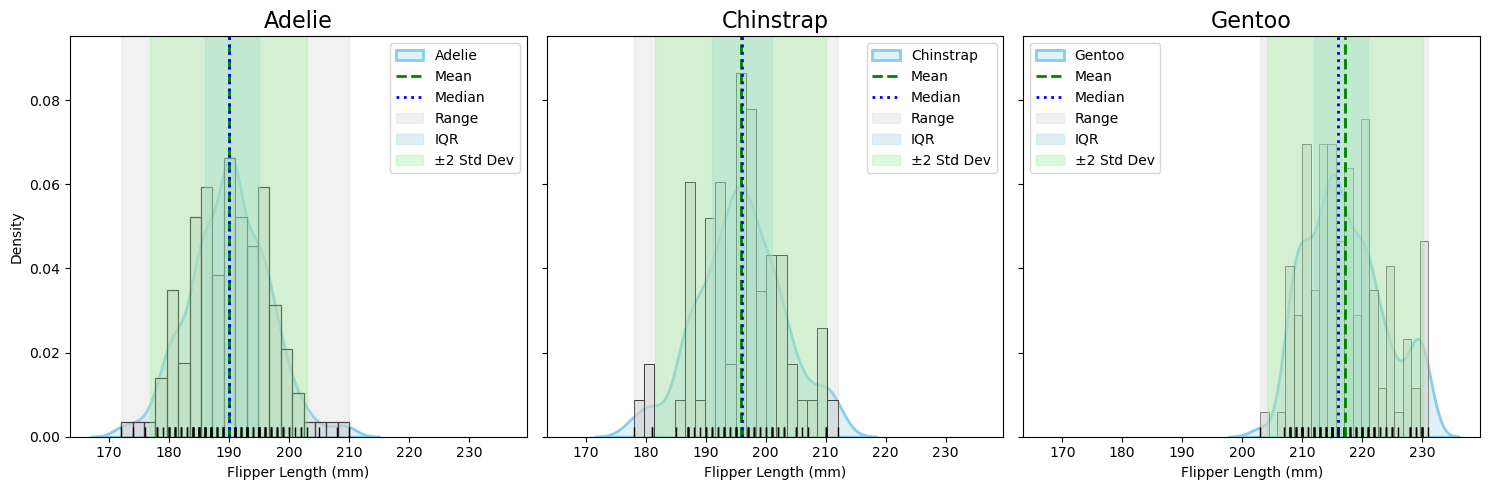

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the web
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get the unique species
species_list = penguins['species'].unique()

# Set up the figure with 3 columns (in case there are more species than 3, adjust rows accordingly)
n_cols = 3
n_rows = int(np.ceil(len(species_list) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=True, sharey=True)

# Flatten axes array to easily iterate
axes = axes.flatten()

# Loop through each species and plot its KDE along with statistics
for idx, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    iqr_val = species_data.quantile(0.75) - species_data.quantile(0.25)
    lower_iqr = species_data.quantile(0.25)
    upper_iqr = species_data.quantile(0.75)
    std_val = species_data.std()
    lower_std = mean_val - 2 * std_val
    upper_std = mean_val + 2 * std_val

    # KDE plot with custom bandwidth and rug plot
    sns.kdeplot(species_data, ax=axes[idx], fill=True, color='skyblue', bw_adjust=0.7, label=f'{species}', lw=2)
    sns.rugplot(species_data, ax=axes[idx], color='black')

    # Overlay Histogram for better insight into raw data
    sns.histplot(species_data, ax=axes[idx], kde=False, bins=20, color='lightgray', alpha=0.5, stat='density')

    # Add vertical lines for mean and median
    axes[idx].axvline(mean_val, color='green', linestyle='--', lw=2, label=f'Mean')
    axes[idx].axvline(median_val, color='blue', linestyle=':', lw=2, label=f'Median')
    
    # Add shaded areas for range, IQR, and ±2 std
    axes[idx].axvspan(min_val, max_val, color='lightgray', alpha=0.3, label='Range')
    axes[idx].axvspan(lower_iqr, upper_iqr, color='lightblue', alpha=0.4, label='IQR')
    axes[idx].axvspan(lower_std, upper_std, color='lightgreen', alpha=0.3, label='±2 Std Dev')

    # Set title and labels
    axes[idx].set_title(f'{species}', fontsize=16)
    axes[idx].set_xlabel('Flipper Length (mm)')
    axes[idx].set_ylabel('Density')

    # Show the legend
    axes[idx].legend()

# Remove extra subplots if there are fewer than 3 species
if len(species_list) < len(axes):
    for extra_idx in range(len(species_list), len(axes)):
        fig.delaxes(axes[extra_idx])

# Adjust layout
plt.tight_layout()
plt.show()


3. 


    1. Box Plot
Pros:

Compact Summary: Clearly shows the median, quartiles (Q1 and Q3), and outliers in a concise format.
Easy Comparison: Ideal for comparing multiple datasets side-by-side since it condenses key statistical insights.
Identifies Outliers: Explicitly highlights outliers, making them easy to spot.
Cons:

Lack of Detail: Does not show the full distribution or the shape of the data (e.g., bimodality or skewness).
Abstract Representation: The box plot gives a statistical summary, but the shape or frequency of data points isn't clear.


    2. Histogram
Pros:

Detailed Distribution: Displays the full range of data and gives insight into the distribution’s shape (e.g., skewness, modality).
Intuitive: Easily interpretable, especially for non-experts, as it shows the actual frequencies of data points within intervals (bins).
Cons:

Bin Size Sensitivity: The appearance of the histogram depends heavily on the bin width. Too wide bins can oversimplify the data, while too narrow bins can make the plot noisy.
Discrete Nature: Unlike KDE, histograms are less smooth and do not give a continuous probability distribution.


    3. Kernel Density Estimation (KDE)
Pros:

Smooth Distribution: Provides a continuous, smooth estimate of the probability density, revealing the underlying distribution shape more fluidly than a histogram.
Shape Insight: Great for understanding complex features of the distribution, like bimodality, peaks, or skewness.
Cons:

Obscures Frequencies: Since it’s a probability density, it doesn’t explicitly show individual data points or exact frequencies, which can make it harder to see how many observations are in certain ranges.
Sensitivity to Bandwidth: Similar to bin width in histograms, the choice of bandwidth affects the smoothness and can over-smooth or under-smooth the data.



I prefer histograms because they provide clear, detailed insights into the frequency of data, making it easier to distinguish differences between groups. Their bar format is visually appealing and familiar, which helps quickly spot patterns.

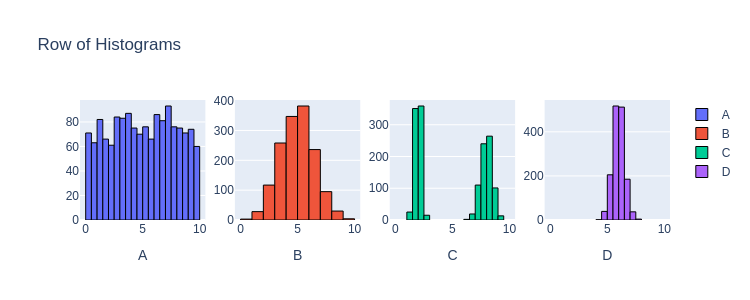

In [9]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

4. 
    
    1. B and D
    
    2. B and C
    
    3. C and D
    
    4. A and D

https://chatgpt.com/share/66f37f4c-1aa0-8002-9fb1-8d40a381e9ed

1. **Initial Problem**: You asked for code to overlay key statistics (mean, median, range, IQR, and ±2 standard deviations) on **Plotly histograms** of the `flipper_length_mm` variable for each penguin species from the Seaborn dataset.

2. **Plotly Graph**: I provided a solution using Plotly with `add_hline` and `add_vrect` to mark the key statistics and ranges. You later clarified that you wanted separate graphs for each species.

3. **Overlap Issue**: You mentioned that names in the Plotly graphs were overlapping. I resolved this by focusing on organizing the layout into separate plots.

4. **KDE Solution**: You asked for a similar solution using **Seaborn KDE** plots, organized into rows of three plots. I provided a code that generated KDE plots with vertical lines and shaded areas to represent the mean, median, IQR, and range.

5. **Pros and Cons of Data Visualization Methods**: You shared an insightful comparison of **box plots**, **histograms**, and **KDE plots**. I agreed with your descriptions and provided a pros and cons list for each method, discussing the benefits and drawbacks of each.

6. **Enhancing the KDE Plot**: You asked if the KDE code I gave was optimal. I suggested several improvements, including adjusting the **bandwidth**, adding **rug plots** to show individual data points, combining **histograms with KDE**, and comparing distributions on one plot.



In [6]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

NameError: name 'px' is not defined

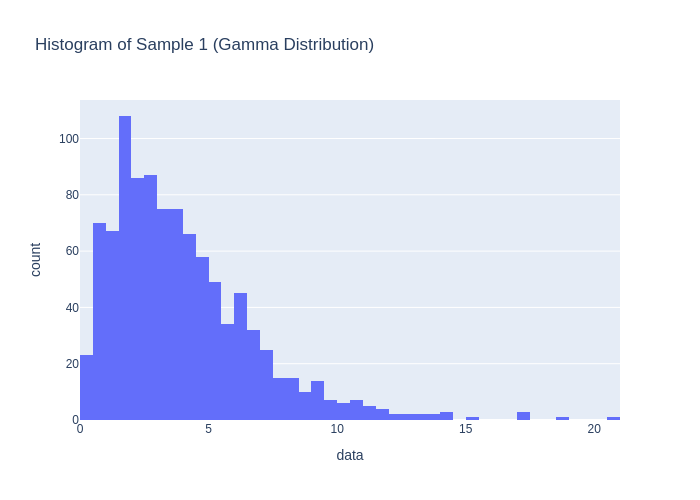

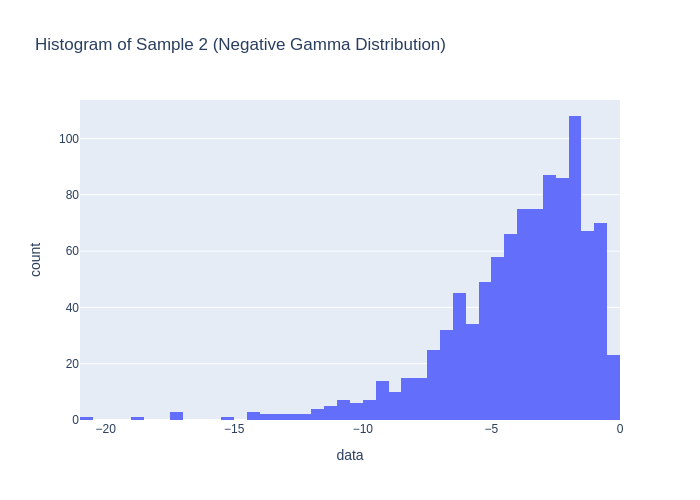

Sample 1 Mean: 3.985959101797044, Median: 3.393759236645405
Sample 2 Mean: -3.985959101797044, Median: -3.393759236645405


In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats

# Generating sample1 from a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Creating a DataFrame for sample1
df_sample1 = pd.DataFrame({'data': sample1})

# Generating sample2 (negative of sample1)
sample2 = -sample1

# Creating a DataFrame for sample2
df_sample2 = pd.DataFrame({'data': sample2})

# Calculating mean and median
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])[0]

mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])[0]

# Plotting histograms
fig1 = px.histogram(df_sample1, x="data", title='Histogram of Sample 1 (Gamma Distribution)')
fig2 = px.histogram(df_sample2, x="data", title='Histogram of Sample 2 (Negative Gamma Distribution)')

# Show the figures
fig1.show(renderer="png")
fig2.show(renderer="png")

# Display the calculated statistics
print(f'Sample 1 Mean: {mean_sample1}, Median: {median_sample1}')
print(f'Sample 2 Mean: {mean_sample2}, Median: {median_sample2}')


Sample 1 is right-skewed (positive skew). In these distributions, the mean is typically greater than the median also have a long tail on the right-hand side.
Sample 2 is left-skewed (negative skew). In these distributions, the mean is typically less than the median also have a long tail on the left-hand side.

In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


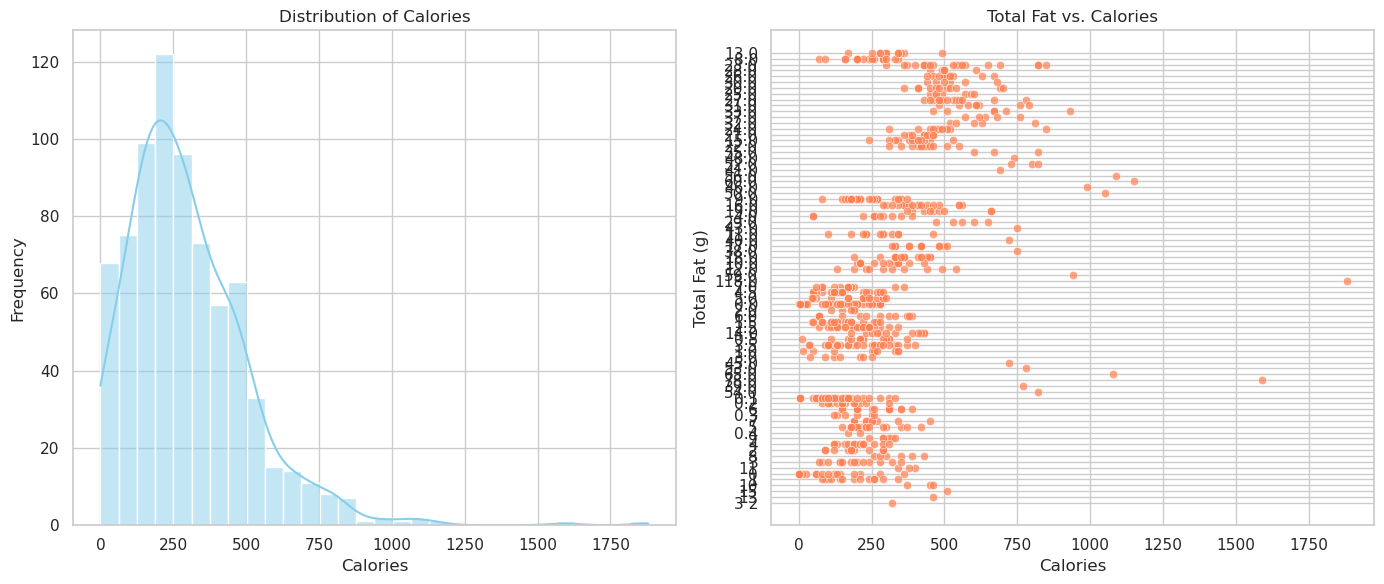

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualization 1: Distribution of Calories
sns.histplot(df['calories'], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title('Distribution of Calories')
axes[0].set_xlabel('Calories')
axes[0].set_ylabel('Frequency')

# Visualization 2: Scatter plot of Total Fat vs Calories
sns.scatterplot(x='calories', y='total fat (g)', data=df, ax=axes[1], color="coral", alpha=0.7)
axes[1].set_title('Total Fat vs. Calories')
axes[1].set_xlabel('Calories')
axes[1].set_ylabel('Total Fat (g)')

# Show the visualizations
plt.tight_layout()
plt.show()



Calories: The average caloric content is around 296, with a maximum of 1880 calories.

Fat:The average total fat is approximately 13 grams, with a maximum of 123 grams.

Saturated fat averages around 3.4 grams, with a max of 47 grams.

Cholesterol and Sodium:Cholesterol ranges widely, with an average of 42 mg and a max of 550 mg.

Sodium content averages at 791 mg, with a max of 5430 mg.

Carbohydrates: On average, 33 grams of carbohydrates, with some items having up to 195 grams.

Sugars and Protein: Sugar content varies greatly, averaging around 25 grams but can reach up to 128 grams.
Protein content averages 11 grams, but some items provide as much as 118 grams.

Here are two key visualizations of the data:

Distribution of Calories:
The histogram shows that most food items have between 0 to 600 calories, with a noticeable peak around 200-300 calories.
There are some items that contain a significantly higher calorie content, reaching as high as 1880 calories, but these are less frequent.


Total Fat vs. Calories:
The scatter plot indicates a positive relationship between total fat and calories, meaning items with higher fat content tend to have more calories.
There is considerable variation, with some low-calorie items having relatively high fat and vice versa.


https://chatgpt.com/share/66f5f257-c7fc-8002-9283-a293a6b929f1

1. **Dataset Overview**: 
   - We worked with a fast-food nutritional dataset, exploring columns like calories, fat, sodium, carbohydrates, sugars, and protein.
   
2. **Initial Data Exploration**: 
   - Summary statistics were generated, showing key insights like average calories, fat, and sodium content, revealing variability across the data.

3. **Visualizations**:
   - Two visualizations were created: 
     - A histogram showing the **distribution of calories**.
     - A scatter plot showing the **relationship between total fat and calories**.
   
4. **Code Request**: 
   - You requested the code for generating these visualizations, which I provided, including how to load the dataset before plotting.

5. **Clarification on Decision-Making**: 
   - You asked about decision-making outcomes, risks, and uncertainty, which seemed unrelated to the code and analysis we were working on. I requested clarification to understand the context better.


In [9]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

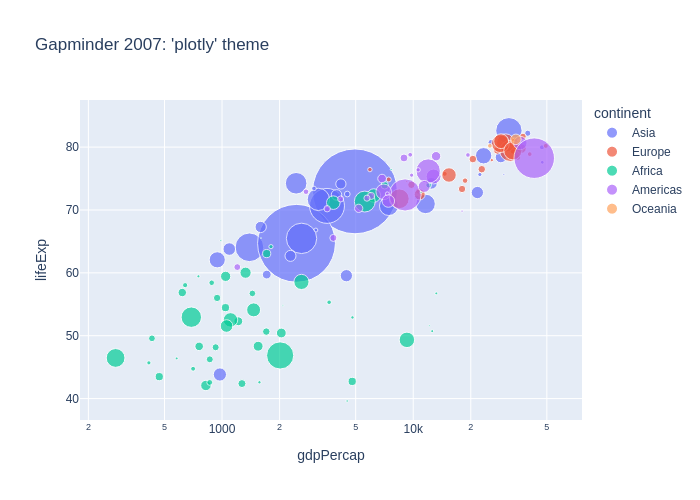

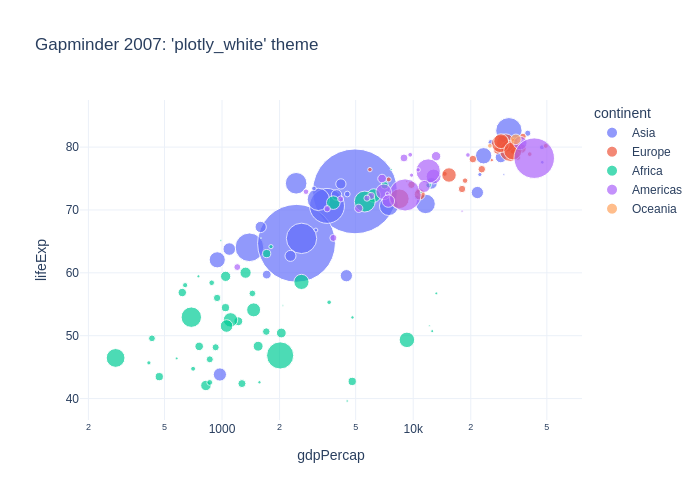

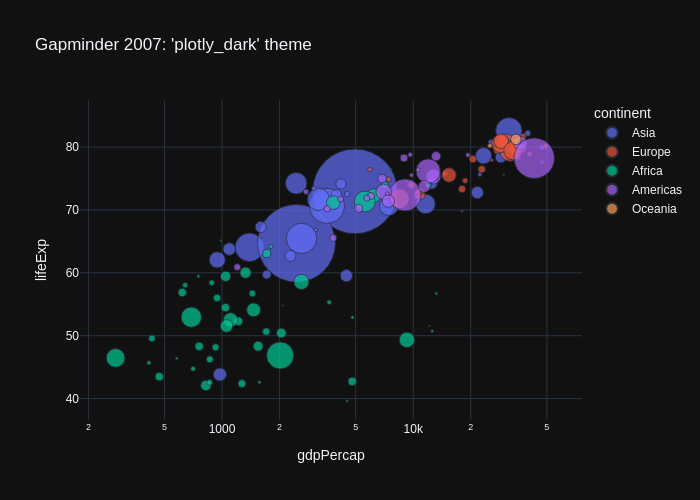

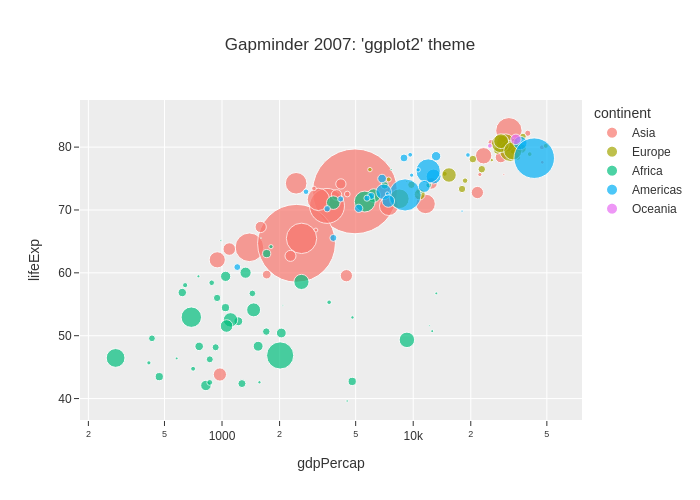

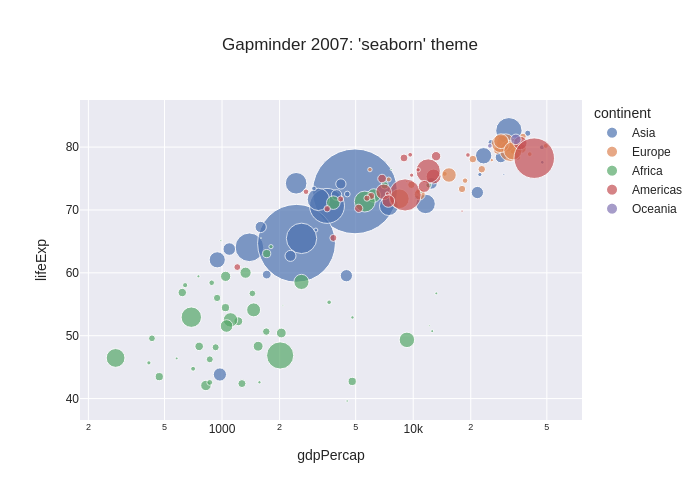

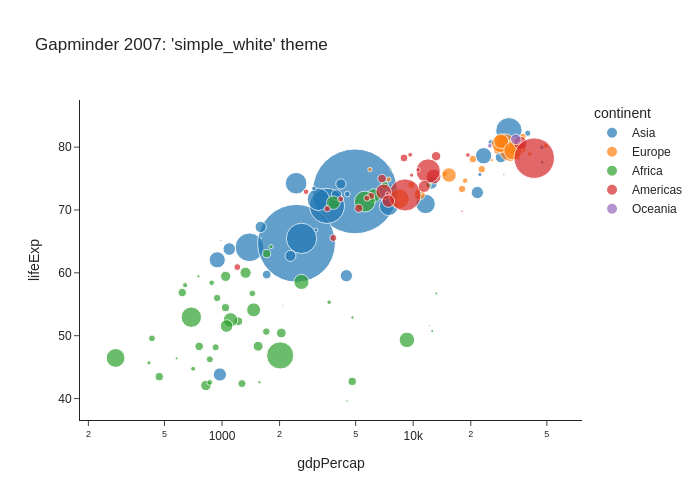

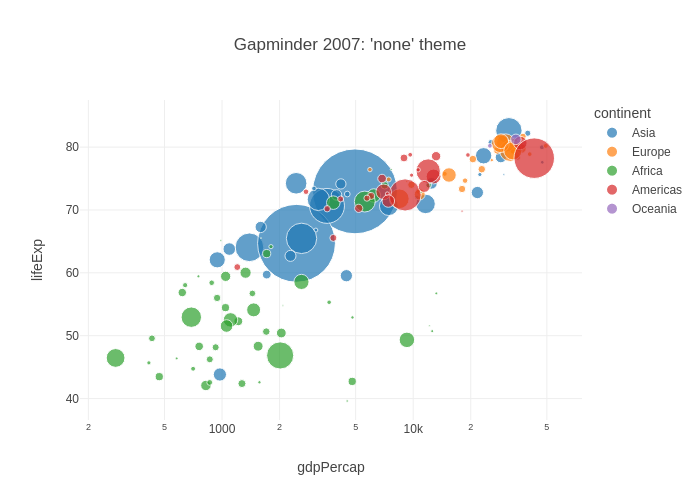

In [3]:
import plotly.express as px

df = px.data.gapminder()
df_2007 = df.query("year==2007")

for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.scatter(df_2007,
                     x="gdpPercap", y="lifeExp", size="pop", color="continent",
                     log_x=True, size_max=60,
                     template=template, title="Gapminder 2007: '%s' theme" % template)
    fig.show(renderer="png")

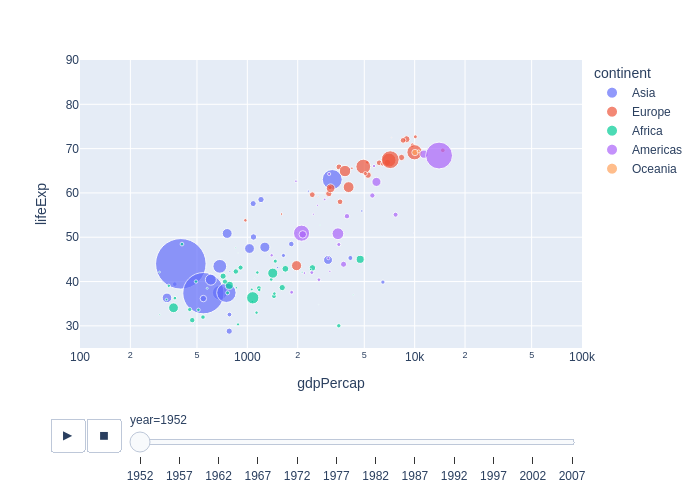

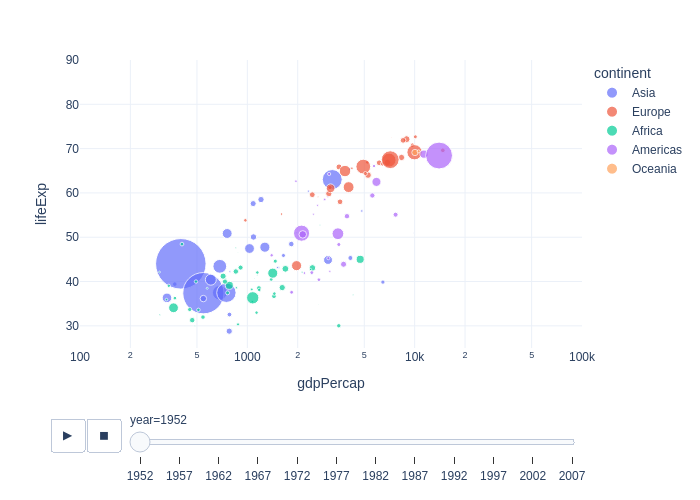

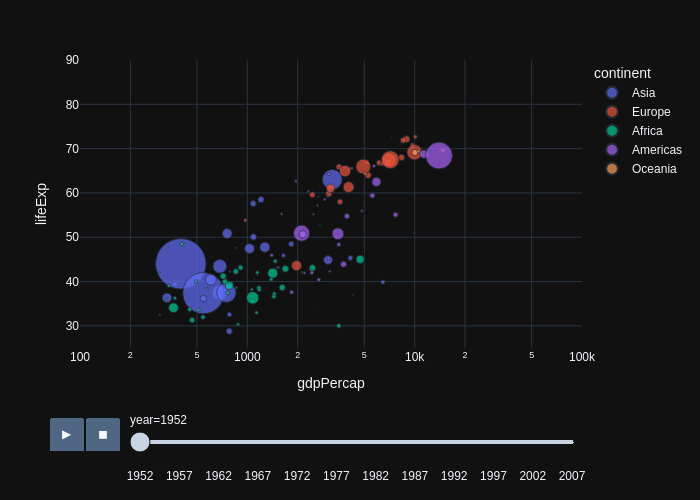

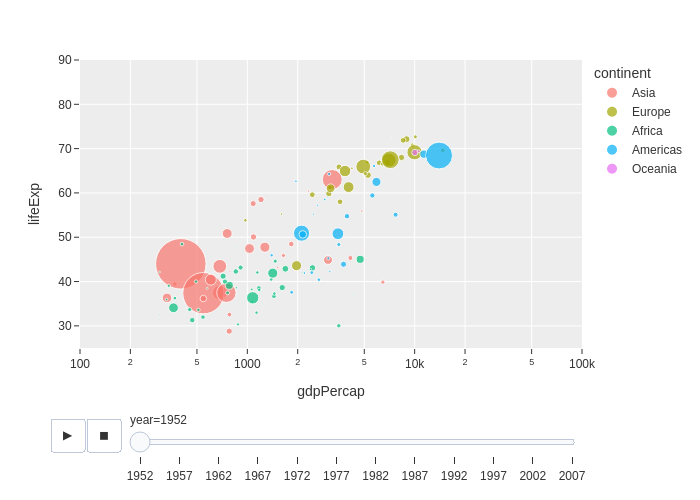

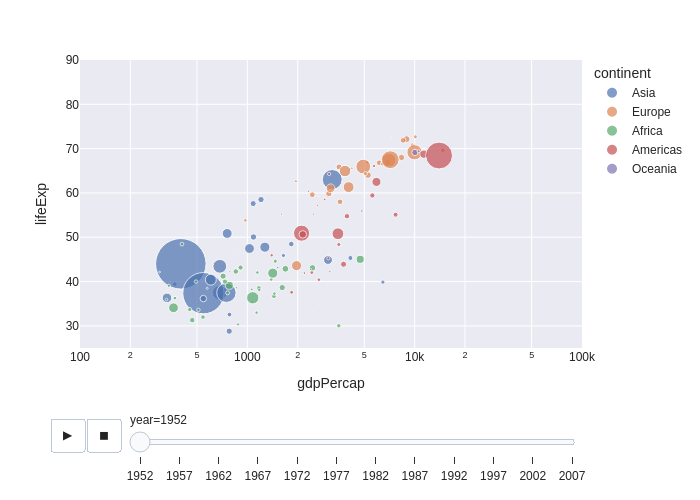

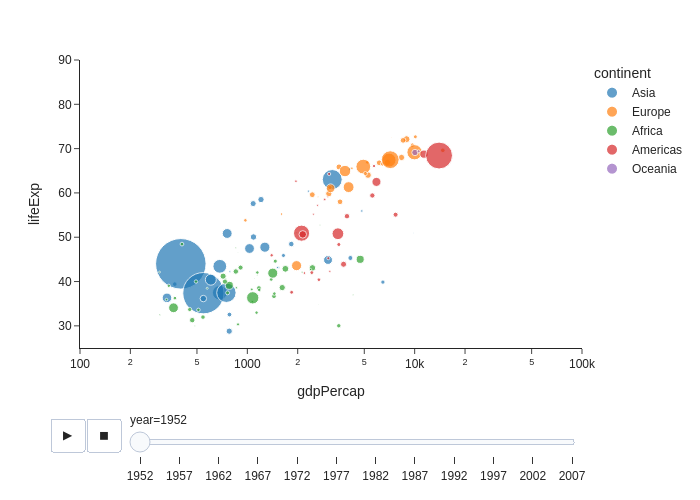

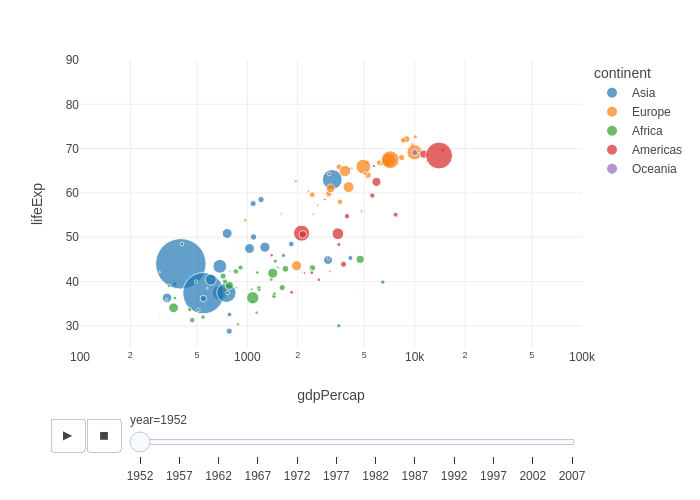

In [4]:
import plotly.express as px

# Load Gapminder dataset
df = px.data.gapminder()

# Loop through each template and create the scatter plot
for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    # Create scatter plot with the specified template
    fig = px.scatter(df, 
                     x="gdpPercap", 
                     y="lifeExp", 
                     animation_frame="year", 
                     animation_group="country",
                     size="pop", 
                     color="continent", 
                     hover_name="country",
                     log_x=True, 
                     size_max=55, 
                     range_x=[100, 100000], 
                     range_y=[25, 90],
                     template=template)  # Apply template
    
    # Show the figure for each template (this works best in interactive environments like Jupyter)
    fig.show(renderer="png")

    # Optional: Save each figure to an HTML file for later review
    # fig.write_html(f"gapminder_{template}.html")


In [5]:
import plotly.express as px

# Assuming you have a dataframe `df` with appropriate columns:
# "percent change", "rank", "percent", "sex", "year", "name"

# Create scatter plot
fig = px.scatter(df, 
                 x="percent change",  # X-axis: Percent change
                 y="rank",  # Y-axis: Rank
                 animation_frame="year",  # Animate by year
                 animation_group="name",  # Group animation by name
                 size="percent",  # Size of bubbles based on percent
                 color="sex",  # Color based on sex
                 hover_name="name",  # Hover to show name
                 size_max=50,  # Maximum bubble size
                 range_x=[-0.005, 0.005]  # X-axis range
                )

# Show the figure
fig.show(renderer="png")


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: percent change

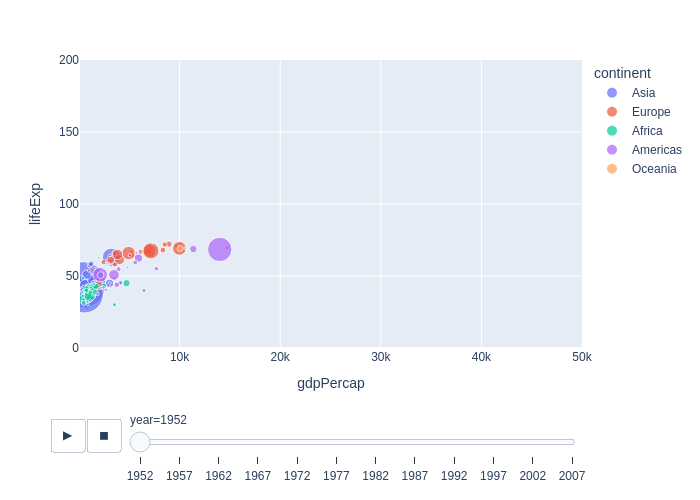

In [6]:
import plotly.express as px

# Load Gapminder dataset
df = px.data.gapminder()

# Create scatter plot
fig = px.scatter(df, 
                 x="gdpPercap",  # X-axis: GDP per capita (could represent "percent change")
                 y="lifeExp",  # Y-axis: Life expectancy (could represent "rank")
                 animation_frame="year",  # Animate by year
                 animation_group="country",  # Group animation by country
                 size="pop",  # Size of bubbles based on population (could represent "percent")
                 color="continent",  # Color based on continent (similar to "sex")
                 hover_name="country",  # Hover to show country name
                 size_max=50,  # Maximum bubble size
                 range_x=[100, 50000],  # X-axis range (since GDP is in log scale)
                 range_y=[0, 200] 
                )

# Show the figure
fig.show(renderer="png")


9. yes

https://chatgpt.com/share/66f5f2ec-5138-8002-a135-d64835bdda8b
In our conversation, you initially asked about the relationship between mean, median, and skewness in data distributions, where we discussed how in right-skewed distributions, the mean is typically greater than the median, and in left-skewed distributions, the mean is less than the median.

Next, you worked with Python to generate histograms and scatter plots using libraries like Plotly, SciPy, and pandas. We corrected a few errors, such as missing imports for Plotly Express (px) and the absence of specific column names in your dataset. You wanted to visualize data from the Gapminder dataset, applying different Plotly templates and modifying the plot to have x-axis as "percent change," y-axis as "rank," and bubbles sized by "percent." After encountering column name errors, we discussed ensuring the correct data structure and created a custom DataFrame to test the visualization.

Lastly, I provided a clean example of the correct code for the scatter plot using custom data for "percent change," "rank," and other variables.